In [35]:
# 电力大数据助力抗击疫情
"""
1.分析小区疫情前后用电量的日负荷变化以及用户数量的变化情况

2.将小区人口数据分为3类：

a.被感染小区前一周都不在家的用户，之后回来的用户，为安全用户
b.一直在小区的用户，需要自觉隔离
c.感染后不在小区的用户，但是在这之前一直在小区，这部分用户可能携带病毒，需要汇报行程，以及自觉隔离。
"""

'\n1.分析小区疫情前后用电量的日负荷变化以及用户数量的变化情况\n\n2.将小区人口数据分为3类：\n\na.被感染小区前一周都不在家的用户，之后回来的用户，为安全用户\nb.一直在小区的用户，需要自觉隔离\nc.感染后不在小区的用户，但是在这之前一直在小区，这部分用户可能携带病毒，需要汇报行程，以及自觉隔离。\n'

In [1]:
import pandas as pd
import numpy as np
from pyecharts import options as opts
from pyecharts.charts import Page, Pie
import pymysql
from datetime import datetime,timedelta
from dateutil.parser import parse
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib.ticker as ticker

In [2]:
def get_data_from_database(db_table_name):
    con = pymysql.connect(host = "localhost", 
               user = "root", password = '180153', 
               db = "epidemic", charset='utf8')

    sql = "select cons_no,this_pq,trade_code,ds from " + db_table_name + " where cons_no is not null and ds like '2021%'"
    df = pd.read_sql(sql, con)
    con.close()
    df["this_pq"] = df["this_pq"].apply(lambda x: float(x))
    userid = list(set(df['cons_no']))
    print('该小区2021年一共有{0}户'.format(len(userid)))
    return df, userid


db_table_name = "ga_daypq_suqian_city_zhonghua_analysis"
df, userid = get_data_from_database(db_table_name)
# 统计7月每天的负荷
df.index =  df["ds"].map(lambda date: parse(str(date)))

该小区2021年一共有356户


In [3]:
# 统计7月每天的负荷
df.index =  df["ds"].map(lambda date: parse(str(date)))
index = pd.date_range('20210701','20210728',freq='D')

In [4]:
number_day = []
load_day = []
hvr_day = []

for day in index:
    data_day = df.loc[day]
    # userid = list(set(df['cons_no']))
    load_day.append(data_day["this_pq"].sum())
    number_day.append(sum(data_day["this_pq"] > 0.9))
    hvr_day.append(1 - sum(data_day["this_pq"] > 0.9)/len(data_day))

[ 8.69774    8.66154    7.41576    8.11205    6.43415    6.41728
  6.3972     7.38812    8.07979    8.97631    9.88125    9.67661
  9.24309   10.12155    9.17882    6.3796     7.0993614  8.238715
  8.36015    9.09778    8.75445    5.64961    4.64188    4.5053
  4.22782    3.79196    3.19322    2.7009157]
[0.25988700564971756, 0.2655367231638418, 0.25988700564971756, 0.2655367231638418, 0.2768361581920904, 0.2768361581920904, 0.2853107344632768, 0.2655367231638418, 0.268361581920904, 0.268361581920904, 0.2655367231638418, 0.2740112994350282, 0.2768361581920904, 0.27118644067796616, 0.268361581920904, 0.28248587570621464, 0.27118644067796616, 0.2768361581920904, 0.2655367231638418, 0.268361581920904, 0.268361581920904, 0.29096045197740117, 0.34463276836158196, 0.34745762711864403, 0.34463276836158196, 0.3389830508474576, 0.3502824858757062, 0.3587570621468926]
[262, 260, 262, 260, 256, 256, 253, 260, 259, 259, 260, 257, 256, 258, 259, 254, 258, 256, 260, 259, 259, 251, 232, 231, 232, 234

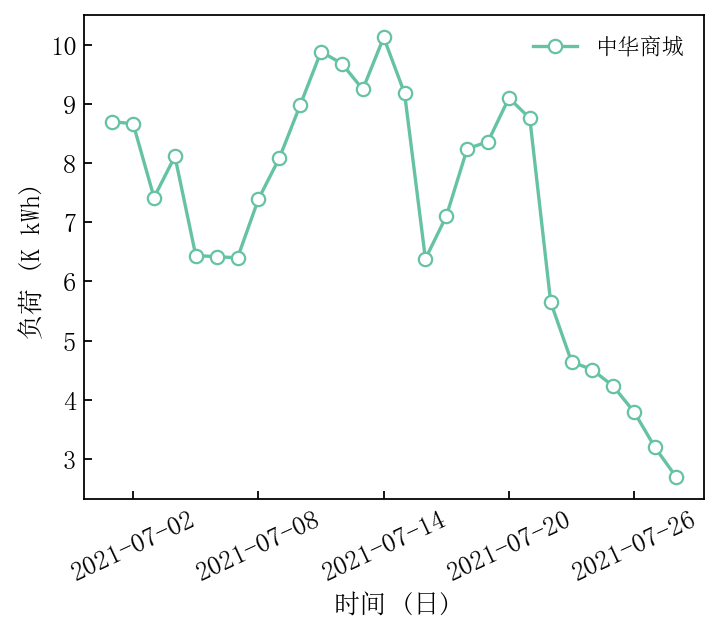

In [6]:

plt.figure(dpi = 160,figsize=(5,4))
config = {
    "font.family":"serif",    #serif
    "font.size": 12,
    "mathtext.fontset":'stix',
    "font.serif": ['SimSun'],
    "xtick.direction": "in",
    "ytick.direction": "in",
}

rcParams.update(config)
colors=plt.cm.get_cmap('Set2')(range(5))
plt.xticks(rotation=25)
plt.xlabel("时间 (日)")
plt.ylabel("负荷 (K kWh)")
plt.plot(index, np.array(load_day)/1000, color=colors[0], marker= "o", mfc='w')

ax = plt.gca()
tick_spacing = 6      #通过修改tick_spacing的值可以修改x轴的密度
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing ))
plt.legend(["中华商城"],loc='best',fontsize="small",frameon=False)
print(np.array(load_day)/1000)
print(hvr_day)
print(number_day)

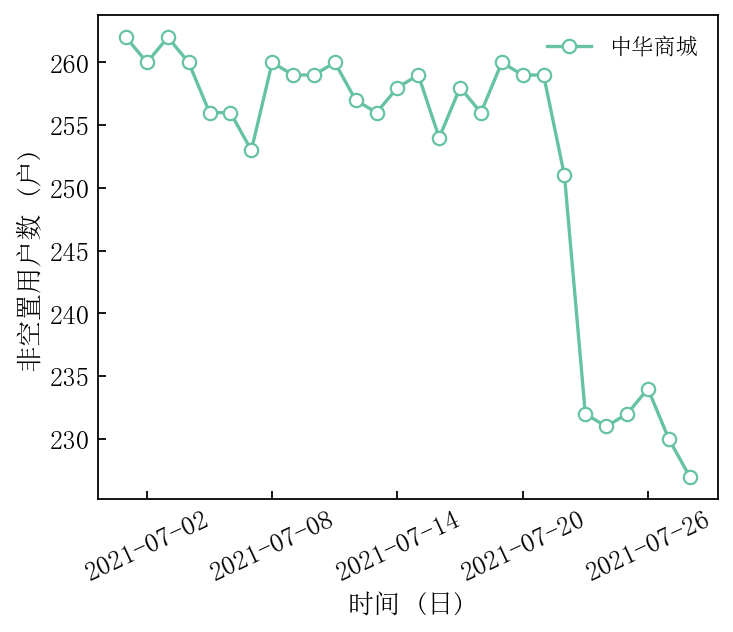

In [7]:

plt.figure(dpi = 160,figsize=(5,4))
config = {
    "font.family":"serif",    #serif
    "font.size": 12,
    "mathtext.fontset":'stix',
    "font.serif": ['SimSun'],
    "xtick.direction": "in",
    "ytick.direction": "in",
}

rcParams.update(config)
colors=plt.cm.get_cmap('Set2')(range(5))
plt.xticks(rotation=25)
plt.xlabel("时间 (日)")
plt.ylabel("非空置用户数 (户)")
plt.plot(index, number_day, color=colors[0], marker= "o", mfc='w')

ax = plt.gca()
tick_spacing = 6      #通过修改tick_spacing的值可以修改x轴的密度
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing ))
plt.legend(["中华商城"],loc='best',fontsize="small",frameon=False)

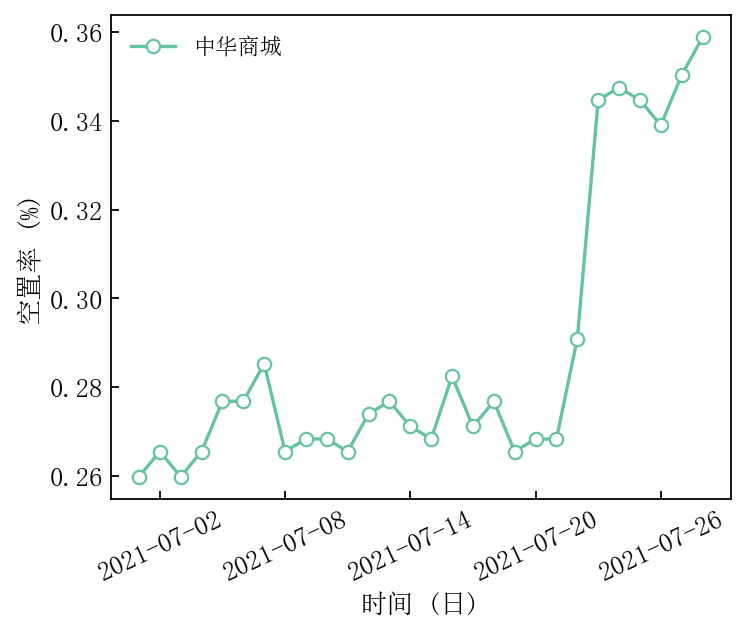

In [8]:

plt.figure(dpi = 160,figsize=(5,4))
config = {
    "font.family":"serif",    #serif
    "font.size": 12,
    "mathtext.fontset":'stix',
    "font.serif": ['SimSun'],
    "xtick.direction": "in",
    "ytick.direction": "in",
}

rcParams.update(config)
colors=plt.cm.get_cmap('Set2')(range(5))
plt.xticks(rotation=25)
plt.xlabel("时间 (日)")
plt.ylabel("空置率 (%)")
plt.plot(index, hvr_day, color=colors[0], marker= "o", mfc='w')

ax = plt.gca()
tick_spacing = 6      #通过修改tick_spacing的值可以修改x轴的密度
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing ))
plt.legend(["中华商城"],loc='best',fontsize="small",frameon=False)

In [8]:
# 流入流出情况统计 7月22号前后开始出现异常,出现疫情
# 分析疫情前后的流入流出状况,前后7天
crisis = pd.date_range('20210715','20210728',freq='D')
data_crisis = df.loc[crisis]
userid = list(set(data_crisis['cons_no']))
inout = {date:([],[]) for date in crisis}


#根据change_stat划分用户
all_unused = []
all_used = []
user_trade = []


for uid in userid:
    user_trade.append(data_crisis.loc[data_crisis["cons_no"] == uid]["trade_code"][0])
    data_uid = data_crisis.loc[data_crisis["cons_no"] == uid]
    change_stat = False
    num = 1
    
    for day in crisis:
        data_uid_day = data_uid.loc[day]
        if num == 1: 
            past_stat = data_uid_day["this_pq"] > 0.9
            num += 1
        else:
            now_stat = data_uid_day["this_pq"] > 0.9
            # 流出
            if  now_stat == False and past_stat == True:
                inout[day][1].append(uid)
                change_stat = True
            # 流入
            elif now_stat == True and past_stat == False:
                inout[day][0].append(uid)
                change_stat = True
            # 更新状态
            past_stat = now_stat
            
    # 一直在家
    if change_stat == False and now_stat == True:
        all_used.append(uid)
    # 一直不在家
    elif change_stat == False and now_stat == False:
        all_unused.append(uid)

In [9]:
print("小区疫情期间一共有{0}个用户\n其中，一直生活在小区用户有{1}个，一直不在家用户有{2}个".format(len(userid),len(all_used),len(all_unused)))
print("状态改变的用户有{}个".format(len(userid) - len(all_used) - len(all_unused)))

小区疫情期间一共有354个用户
其中，一直生活在小区用户有214个，一直不在家用户有88个
状态改变的用户有52个


In [18]:
count = {}
for key in user_trade:
    count[key] = count.get(key,0) + 1

new_count = sorted(count.items(), key = lambda kv:(kv[1], kv[0]),reverse=True)
xlabel = [m[0] for m in new_count]
number = [m[1] for m in new_count]


pie=(
        Pie()
        .add("", [list(z) for z in zip(xlabel , number)])
    
        .set_global_opts(
            legend_opts=opts.LegendOpts(
                orient="vertical", #图例垂直放置
                pos_top="15%",# 图例位置调整
                pos_right="2%"),
        )
        .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {c}"))         
    )
pie.render("pie_base.html")

'C:\\Users\\mzy\\jupyter_code\\宁汇实习\\疫情分析\\pie_base.html'

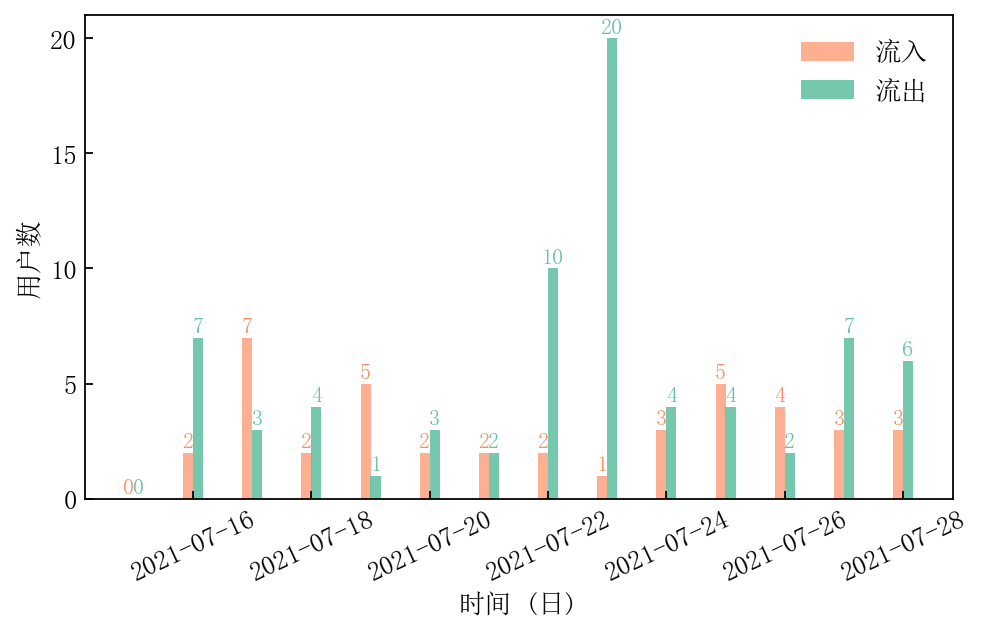

In [11]:
v2l_num = []
l2v_num = []
for key,(v2l, l2v) in inout.items():
    v2l_num.append(len(v2l))
    l2v_num.append(len(l2v))

config = {
    "font.family":"serif",    #serif
    "font.size": 12,
    "mathtext.fontset":'stix',
    "font.serif": ['SimSun'],
    "xtick.direction": "in",
    "ytick.direction": "in",
}
rcParams.update(config)

plt.figure(dpi=160,figsize=(7,4))
bar_width = 0.17 # 设置柱状图的宽度

bar1 = plt.bar(crisis - timedelta(hours=2),  v2l_num, bar_width, color =  plt.cm.get_cmap('Set2')(range(5))[1], alpha=0.7, label="流入")

for a,b,c in zip((crisis - timedelta(hours=2)),v2l_num, v2l_num): ##控制标签位置
    plt.text(a, b+0.1, c, ha='center', va='bottom', fontsize=10, color= plt.cm.get_cmap('Set2')(range(5))[1])
    
bar1 = plt.bar(crisis + timedelta(hours=2), l2v_num, bar_width, color = plt.cm.get_cmap('Set2')(range(7))[0], alpha=0.9, label="流出")

for a,b,c in zip( crisis + timedelta(hours=2), l2v_num, l2v_num): ##控制标签位置
    plt.text(a,b+0.1,c,ha = 'center',va = 'bottom',fontsize=10,color= plt.cm.get_cmap('Set2')(range(7))[0])
    
plt.yticks([5])
plt.xticks(rotation=25)
plt.legend(loc='best',frameon=False)
plt.ylabel("用户数")
plt.xlabel('时间 (日)')
ax = plt.gca()
ax.yaxis.set_major_locator(ticker.MultipleLocator(5))

tick_spacing = 2    #通过修改tick_spacing的值可以修改x轴的密度
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing ))

In [21]:
# 得到流出流入的人员名单
in_list = pd.DataFrame(columns = df.columns)
out_list = pd.DataFrame(columns = df.columns)

for day,(inids,outids) in sorted(inout.items(), key = lambda x:x[0]):
    data_crisis_day = data_crisis.loc[day]
    for inid in inids:
        in_list = in_list.append(data_crisis_day[data_crisis_day["cons_no"] == inid])
    for outid in outids:
        out_list = out_list.append(data_crisis_day[data_crisis_day["cons_no"] == outid])

In [ ]:
in_list.to_excel("流入名单.xlsx", index=False)
out_list.to_excel("流出名单.xlsx", index=False)

In [30]:
in_trade_code =[]
for uid in list(set(in_list["cons_no"])):
    in_trade_code.append(in_list.loc[in_list["cons_no"] == uid]["trade_code"][0])
count = {}
for key in in_trade_code:
    count[key] = count.get(key,0) + 1

new_count = sorted(count.items(), key = lambda kv:(kv[1], kv[0]),reverse=True)
xlabel = [m[0] for m in new_count]
number = [m[1] for m in new_count]

pie=(
        Pie()
        .add("", [list(z) for z in zip(xlabel , number)])
    
        .set_global_opts(
            legend_opts=opts.LegendOpts(
                orient="vertical", #图例垂直放置
                pos_top="15%",# 图例位置调整
                pos_right="2%"),
        )
        .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {c}"))         
    )
pie.render("pie_in_trade.html")



out_trade_code =[]
for uid in list(set(out_list["cons_no"])):
    out_trade_code.append(out_list.loc[out_list["cons_no"] == uid]["trade_code"][0])
count = {}
for key in out_trade_code:
    count[key] = count.get(key,0) + 1

new_count = sorted(count.items(), key = lambda kv:(kv[1], kv[0]),reverse=True)
xlabel = [m[0] for m in new_count]
number = [m[1] for m in new_count]

pie=(
        Pie()
        .add("", [list(z) for z in zip(xlabel , number)])
    
        .set_global_opts(
            legend_opts=opts.LegendOpts(
                orient="vertical", #图例垂直放置
                pos_top="15%",# 图例位置调整
                pos_right="2%"),
        )
        .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {c}"))         
    )
pie.render("pie_out_trade.html")

'C:\\Users\\mzy\\jupyter_code\\宁汇实习\\疫情分析\\pie_out_trade.html'

In [31]:
count = {}
for key in user_trade:
    count[key] = count.get(key,0) + 1

new_count = sorted(count.items(), key = lambda kv:(kv[1], kv[0]),reverse=True)
xlabel = [m[0] for m in new_count]
number = [m[1] for m in new_count]


pie=(
        Pie()
        .add("", [list(z) for z in zip(xlabel , number)])
    
        .set_global_opts(
            legend_opts=opts.LegendOpts(
                orient="vertical", #图例垂直放置
                pos_top="15%",# 图例位置调整
                pos_right="2%"),
        )
        .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {c}"))         
    )
pie.render("pie_base.html")

'C:\\Users\\mzy\\jupyter_code\\宁汇实习\\疫情分析\\pie_base.html'